QuantumEspressoの計算クラスのセットアップ．

In [1]:
from ase.build import bulk
from ase.calculators.espresso import Espresso
atoms = bulk("Si")
pseudopotentials = {'Si':'Si.pbe-n-kjpaw_psl.1.0.0.UPF'}


input_data = {
    'system': {
        'ecutwfc': 64,
        'ecutrho': 576,
        'nbnd' : 12 },
    'disk_io': 'low'}  #Quantum Espressoのpw.xに渡すパラメータらしい…

# kpts:sets the number of kpoints on a grid (defaults to gamma)
calc = Espresso(pseudopotentials=pseudopotentials,kpts=(4, 4, 4),input_data=input_data) #計算機オブジェクトの生成
atoms.set_calculator(calc)

フェルミエネルギー．

In [2]:
atoms.get_potential_energy()
fermi_level = calc.get_fermi_level()
print(fermi_level) #フェルミエネルギーの表示

6.2498


バンド計算モード

In [3]:
input_data.update({'calculation':'bands',
                              'restart_mode':'restart',
                               'verbosity':'high'})
calc.set(kpts={'path':'LGXWG', 'npoints':100},#BZ内のk点を指定
          input_data=input_data)
calc.calculate(atoms)

バンド図の計算

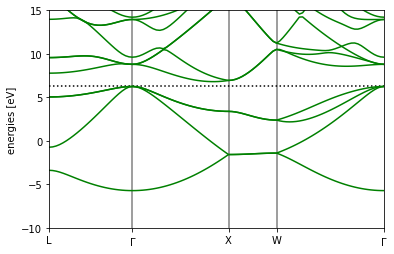

In [4]:
import matplotlib.pyplot as plt

bs = calc.band_structure()
bs.reference = fermi_level

bs.plot(emax=15, filename='Si.png')